# Frequency Domain Analysis

This notebook demonstrates how to perform frequency domain analysis on audio files using the CTC-SpeechRefinement package. We'll explore various spectral features and visualizations that can help understand the frequency characteristics of audio signals.

## Setup

First, let's import the necessary libraries and set up the environment.

In [1]:
# Add the project root to the Python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
from IPython.display import Audio, display
import glob
from pathlib import Path

# Import from the project
from ctc_speech_refinement.core.preprocessing.audio import load_audio
from ctc_speech_refinement.core.eda.frequency_domain import analyze_frequency_domain
from ctc_speech_refinement.core.eda.spectral_features import (
    compute_stft, compute_mel_spectrogram, compute_spectral_centroid,
    compute_spectral_bandwidth, compute_spectral_contrast,
    compute_spectral_flatness, compute_spectral_rolloff
)

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

/home/ngocducpc/miniconda3/envs/speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Audio Data

Let's load an audio file and examine its basic properties.

In [2]:
# Define the path to an audio file
audio_file = "../data/speech2text/input/test1_01.wav"  # Path to the audio file

# Load the audio file using our package's function
audio_data, sample_rate = load_audio(audio_file)

# Print basic information
print(f"Audio file: {audio_file}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(audio_data)}")

# Play the audio
display(Audio(audio_data, rate=sample_rate))

2025-05-07 11:58:32,939 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:58:33,557 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000


Audio file: ../data/speech2text/input/test1_01.wav
Sample rate: 16000 Hz
Duration: 13.32 seconds
Number of samples: 213200


## Comprehensive Frequency Domain Analysis

Let's use our package's analyze_frequency_domain function to perform a comprehensive analysis of the audio in the frequency domain.

2025-05-07 11:58:33,574 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Performing frequency domain analysis
2025-05-07 11:58:33,574 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Calculating spectral features
2025-05-07 11:58:33,643 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting FFT magnitude spectrum
2025-05-07 11:58:33,740 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectrogram
2025-05-07 11:58:33,826 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting mel spectrogram
2025-05-07 11:58:33,870 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting chromagram
2025-05-07 11:58:33,958 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectral contrast
2025-05-07 11:58:33,990 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectral features



Spectral Features:
spectral_centroid_mean: 1515.4129623668448
spectral_centroid_std: 905.9895459748295
spectral_bandwidth_mean: 1467.1802771397397
spectral_bandwidth_std: 384.67964589534444
spectral_rolloff_mean: 2875.6744604316546
spectral_rolloff_std: 1431.5938163325131
spectral_flatness_mean: 0.016791492700576782
spectral_flatness_std: 0.047606393694877625


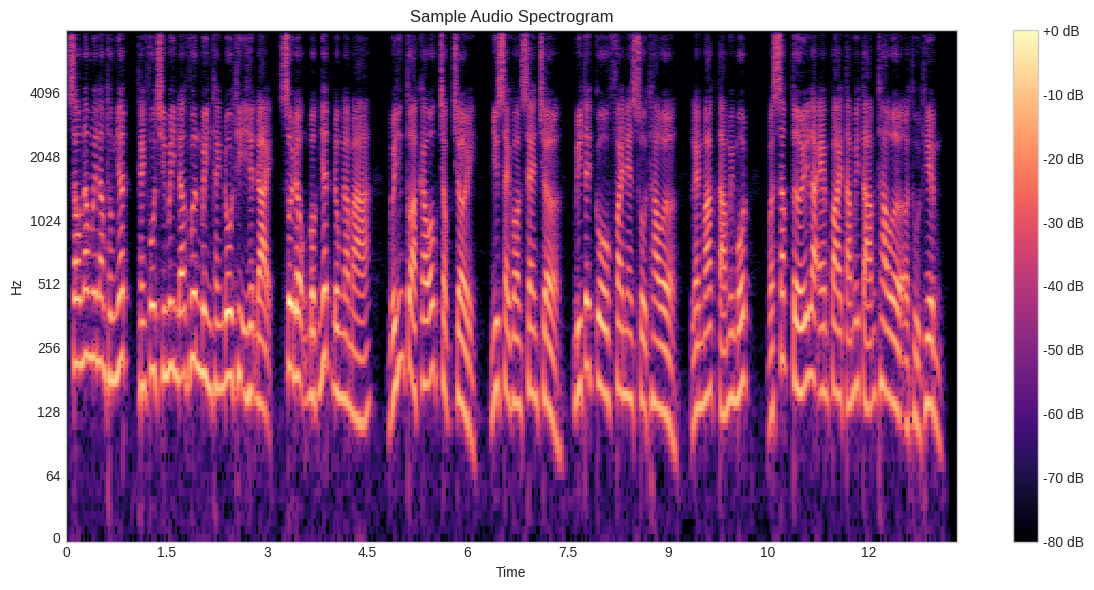

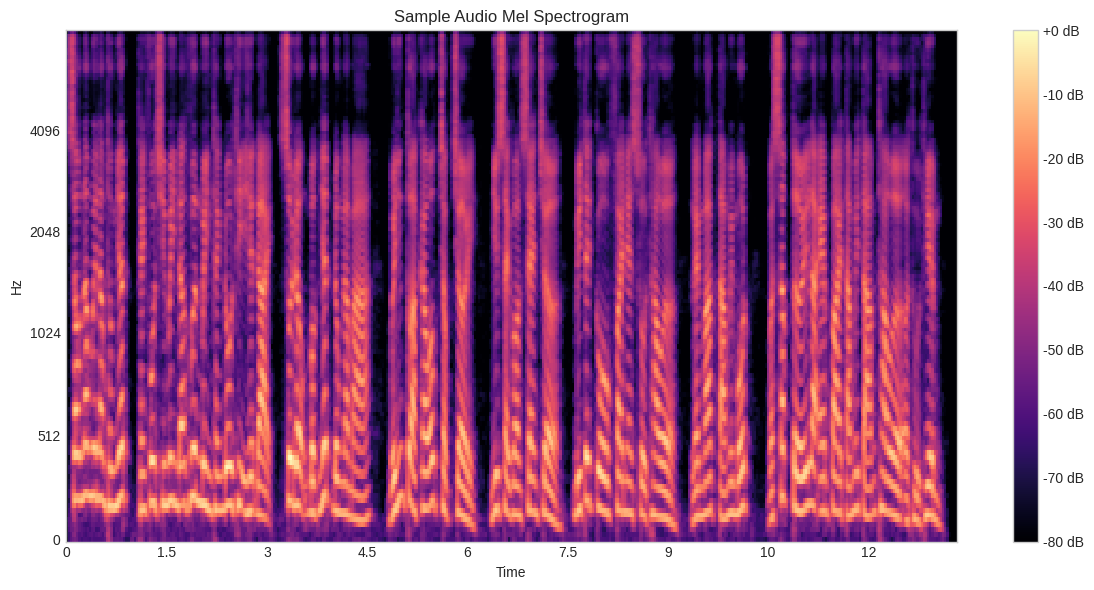

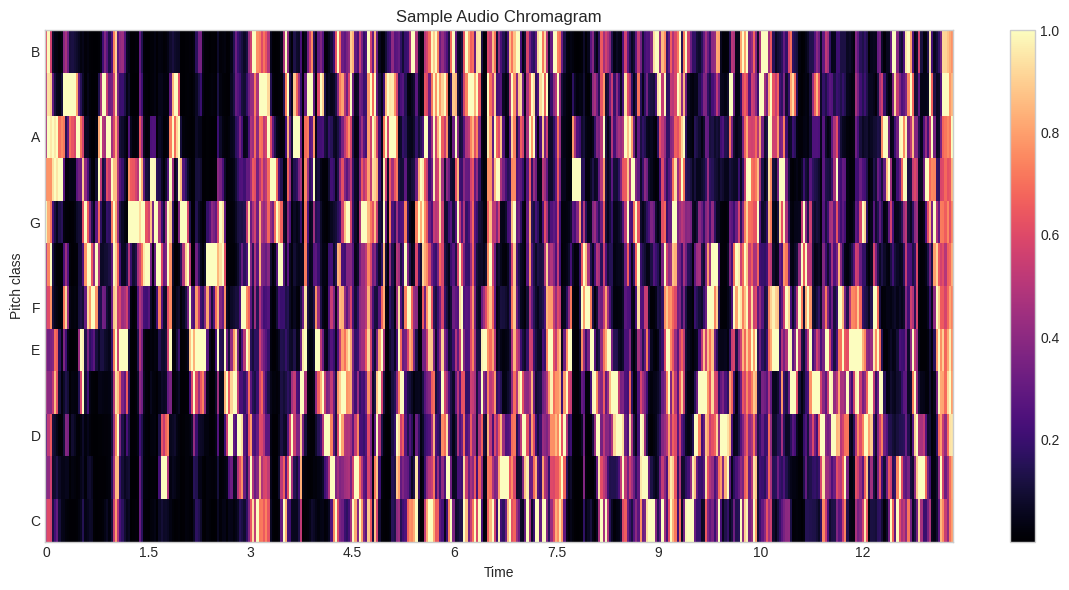

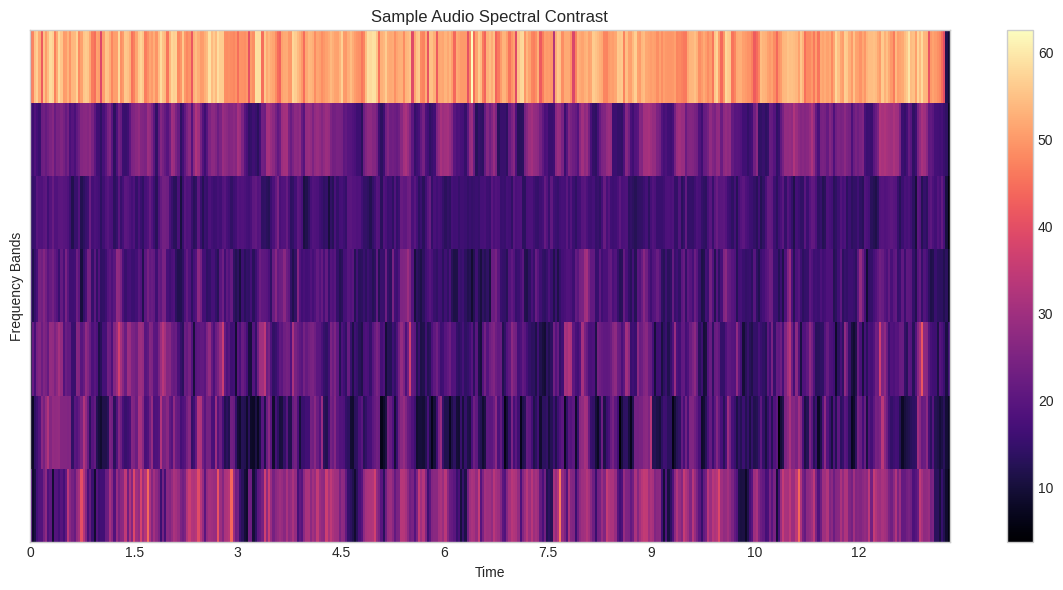

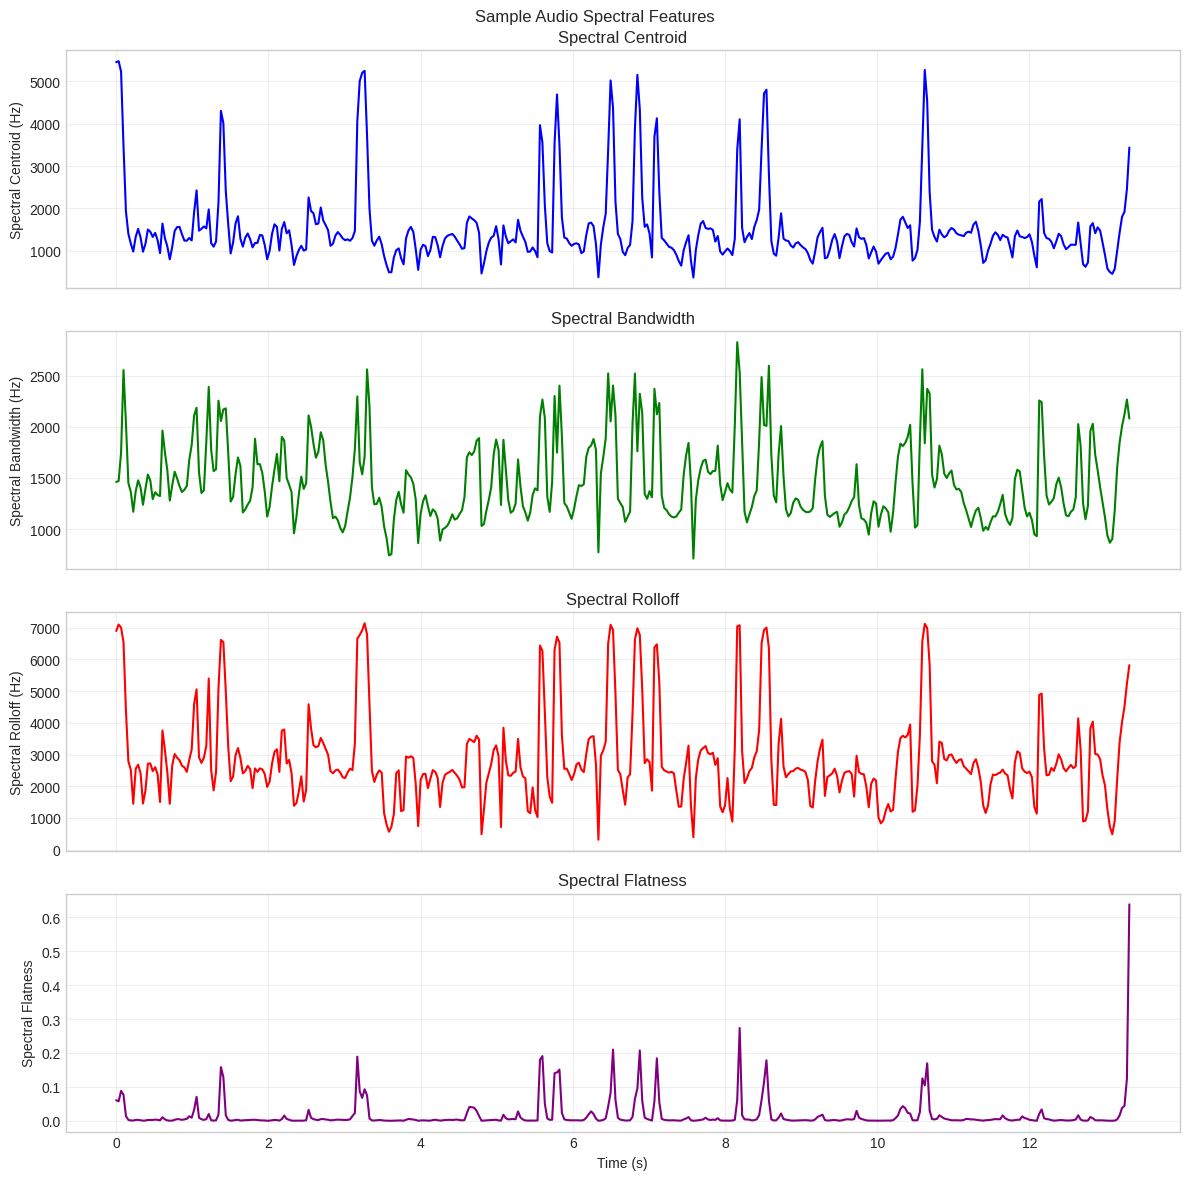

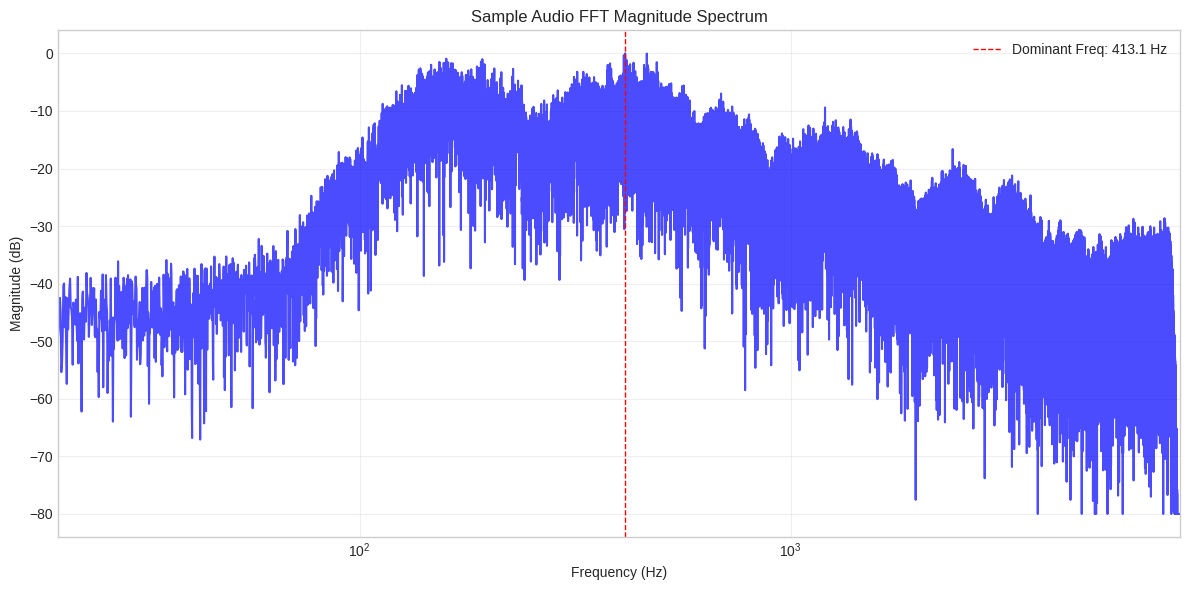

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [3]:
# Use our package's function to analyze frequency domain features
frequency_domain_results = analyze_frequency_domain(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the spectral features
print("\nSpectral Features:")
for feature, value in frequency_domain_results['spectral_features'].items():
    print(f"{feature}: {value}")

# Display the figures
for fig_name, fig in frequency_domain_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Detailed Spectral Analysis

Now let's explore individual spectral features in more detail using our package's specialized functions.

### 1. Short-Time Fourier Transform (STFT)

The STFT is a fundamental transform that converts a time-domain signal into a time-frequency representation.

2025-05-07 11:58:34,873 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing STFT with n_fft=2048, hop_length=512
2025-05-07 11:58:34,878 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - STFT shape: (1025, 417)


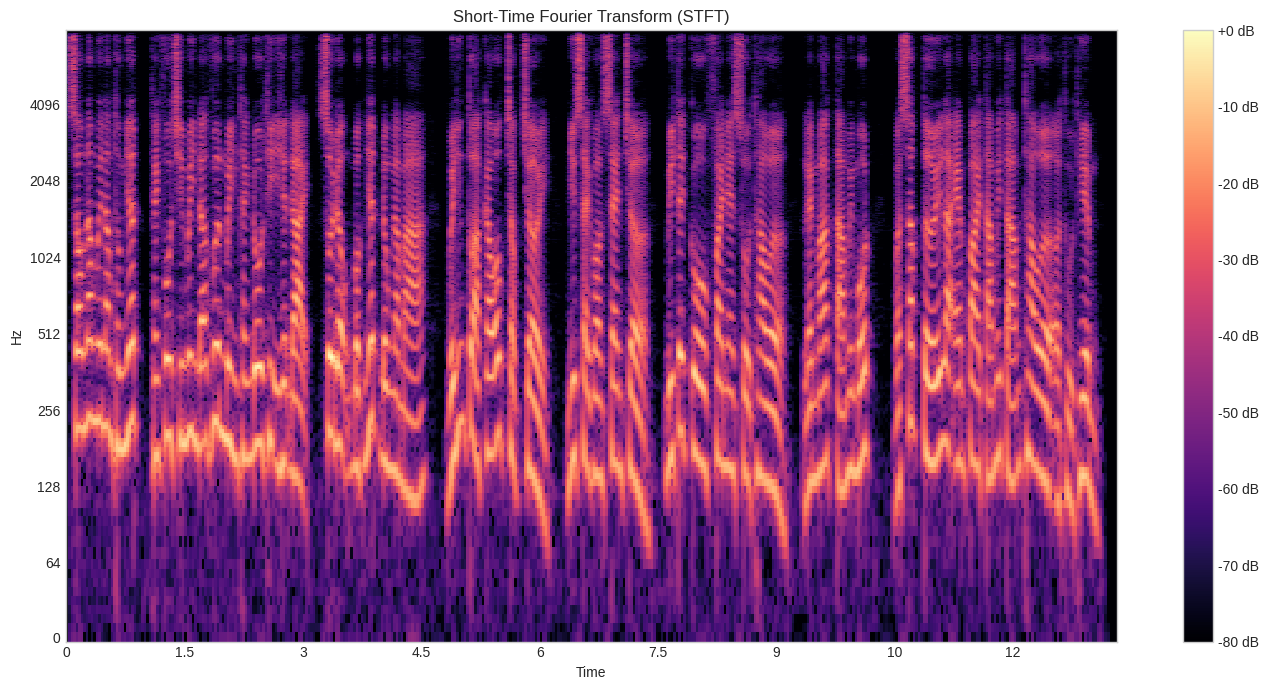

In [4]:
# Compute STFT using our package's function
stft_result = compute_stft(audio_data, n_fft=2048, hop_length=512)

# Convert to dB scale for visualization
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

# Plot the STFT
plt.figure(figsize=(14, 7))
librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='log', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform (STFT)')
plt.tight_layout()
plt.show()

### 2. Mel Spectrogram

The Mel spectrogram is a representation of the STFT where the frequency bins are converted to the Mel scale, which better approximates human auditory perception.

2025-05-07 11:58:35,183 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing Mel spectrogram with n_mels=128
2025-05-07 11:58:35,191 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Mel spectrogram shape: (128, 417)


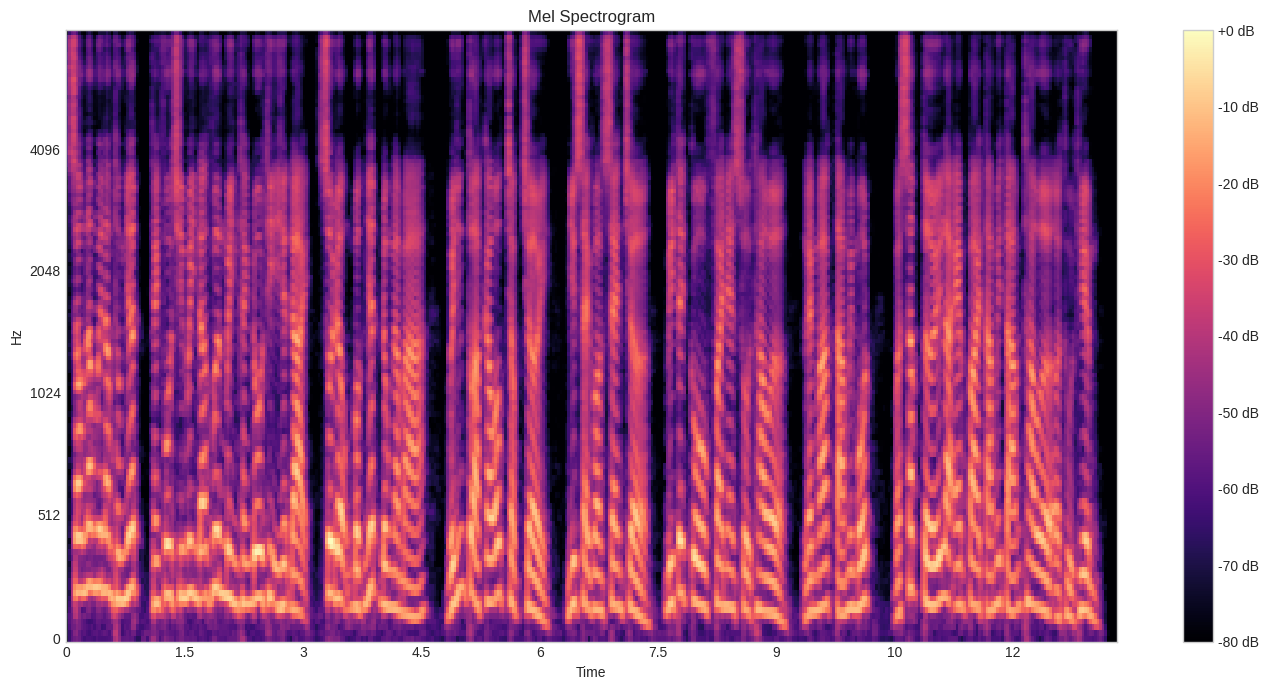

In [5]:
# Compute Mel spectrogram using our package's function
mel_spec = compute_mel_spectrogram(audio_data, sample_rate, n_fft=2048, hop_length=512, n_mels=128)

# Convert to dB scale for visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(14, 7))
librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

### 3. Spectral Centroid

The spectral centroid indicates where the "center of mass" of the spectrum is located. It is a measure of the brightness of a sound.

2025-05-07 11:58:35,337 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing spectral centroid
2025-05-07 11:58:35,344 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Spectral centroid shape: (417,)


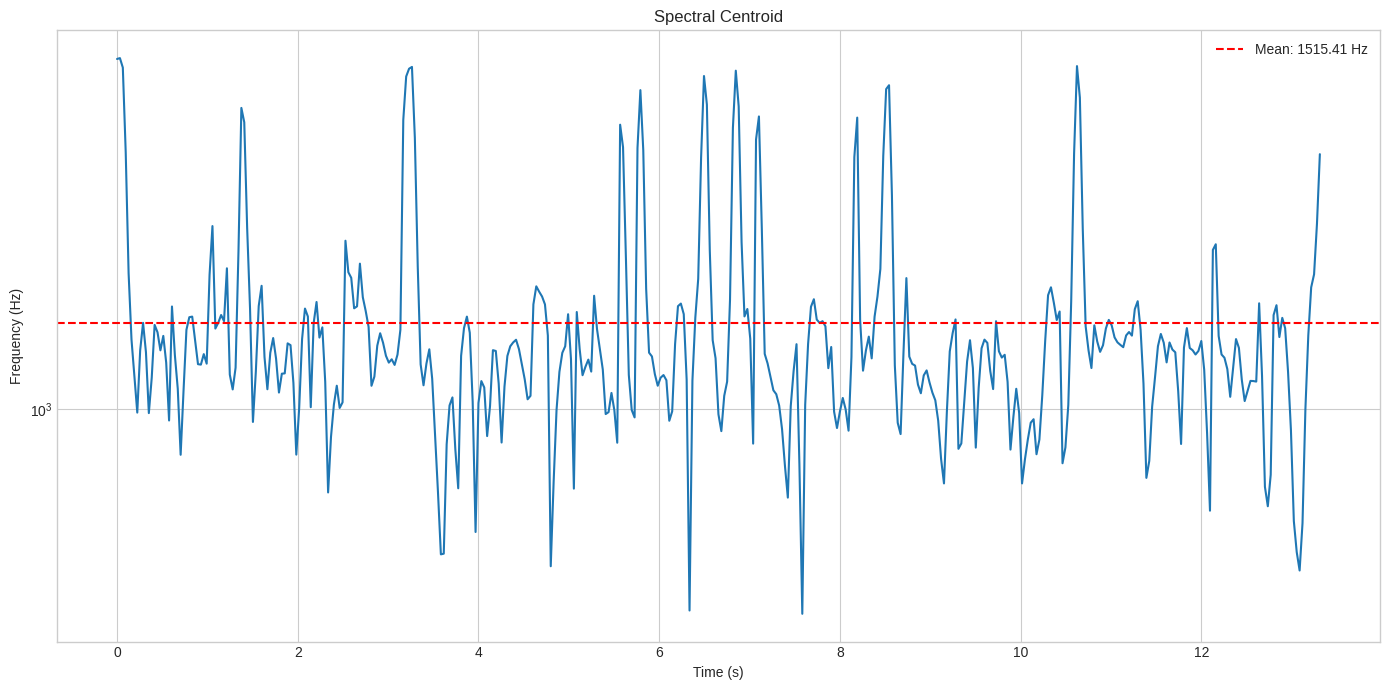

In [6]:
# Compute spectral centroid using our package's function
spectral_centroid = compute_spectral_centroid(audio_data, sample_rate, n_fft=2048, hop_length=512)
centroid_times = librosa.times_like(spectral_centroid, sr=sample_rate, hop_length=512)

# Plot the spectral centroid
plt.figure(figsize=(14, 7))
plt.semilogy(centroid_times, spectral_centroid)
plt.axhline(np.mean(spectral_centroid), color='r', linestyle='--', label=f'Mean: {np.mean(spectral_centroid):.2f} Hz')
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.tight_layout()
plt.show()

### 4. Spectral Bandwidth

The spectral bandwidth measures the width of the spectrum around its centroid. It indicates how "spread out" the frequencies are around the centroid.

2025-05-07 11:58:35,477 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing spectral bandwidth
2025-05-07 11:58:35,485 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Spectral bandwidth shape: (417,)


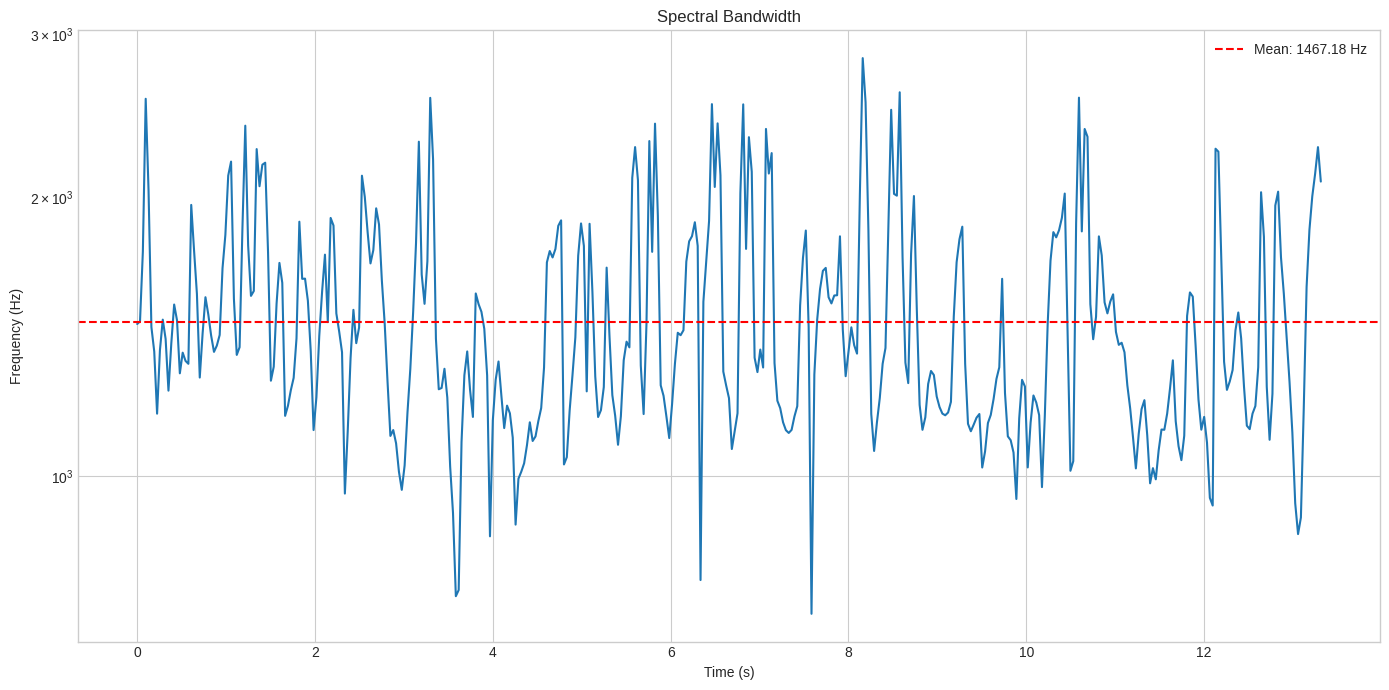

In [7]:
# Compute spectral bandwidth using our package's function
spectral_bandwidth = compute_spectral_bandwidth(audio_data, sample_rate, n_fft=2048, hop_length=512)
bandwidth_times = librosa.times_like(spectral_bandwidth, sr=sample_rate, hop_length=512)

# Plot the spectral bandwidth
plt.figure(figsize=(14, 7))
plt.semilogy(bandwidth_times, spectral_bandwidth)
plt.axhline(np.mean(spectral_bandwidth), color='r', linestyle='--', label=f'Mean: {np.mean(spectral_bandwidth):.2f} Hz')
plt.title('Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.tight_layout()
plt.show()

### 5. Spectral Contrast

Spectral contrast measures the difference between peaks and valleys in the spectrum. It can be used to distinguish between harmonic and percussive components.

2025-05-07 11:58:35,795 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing spectral contrast with n_bands=6
2025-05-07 11:58:35,802 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Spectral contrast shape: (7, 417)


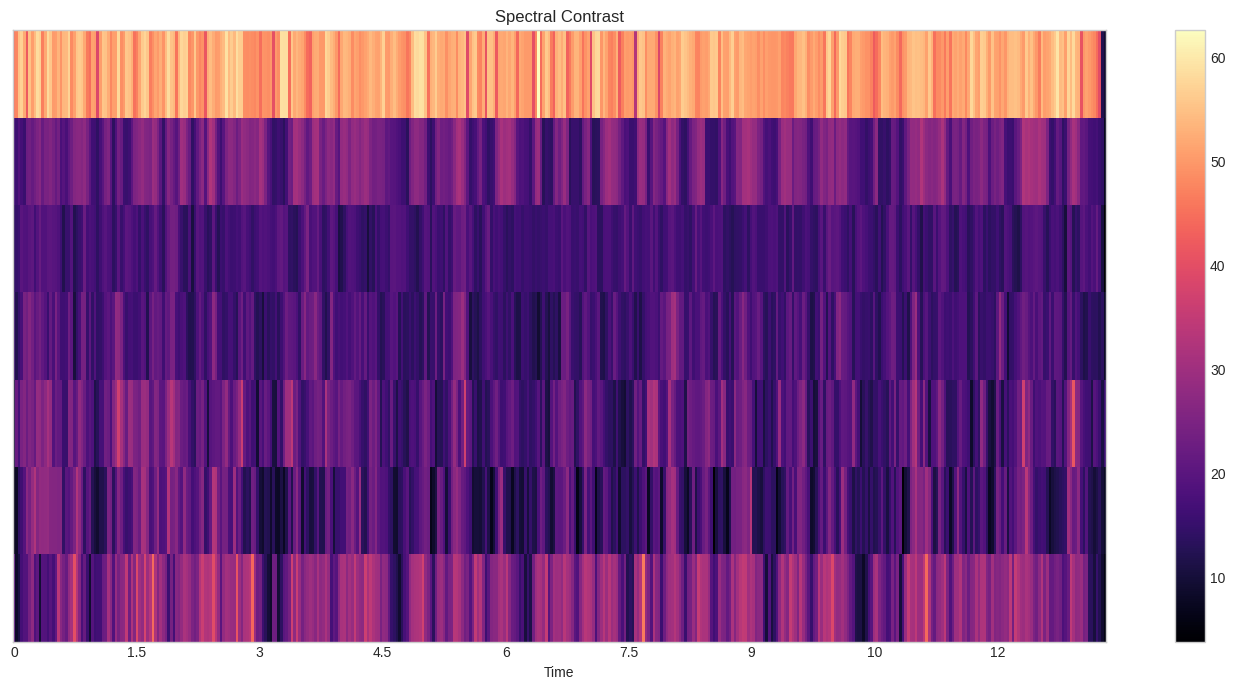

In [8]:
# Compute spectral contrast using our package's function
spectral_contrast = compute_spectral_contrast(audio_data, sample_rate, n_fft=2048, hop_length=512)

# Plot the spectral contrast
plt.figure(figsize=(14, 7))
librosa.display.specshow(spectral_contrast, sr=sample_rate, x_axis='time', hop_length=512)
plt.colorbar()
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

### 6. Spectral Flatness

Spectral flatness measures how noise-like a sound is, as opposed to being tone-like. A high spectral flatness indicates a noise-like sound, while a low spectral flatness indicates a tone-like sound.

2025-05-07 11:58:35,888 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing spectral flatness
2025-05-07 11:58:35,894 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Spectral flatness shape: (417,)


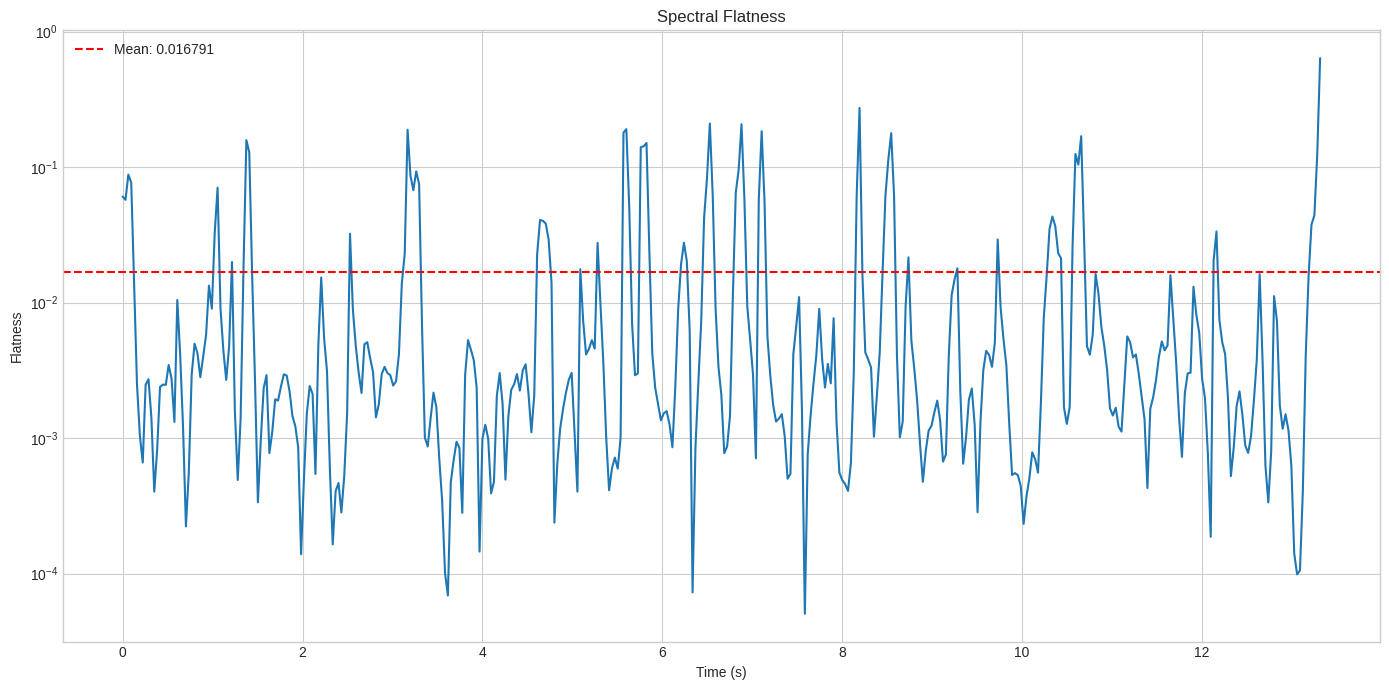

In [9]:
# Compute spectral flatness using our package's function
spectral_flatness = compute_spectral_flatness(audio_data, n_fft=2048, hop_length=512)
flatness_times = librosa.times_like(spectral_flatness, sr=sample_rate, hop_length=512)

# Plot the spectral flatness
plt.figure(figsize=(14, 7))
plt.semilogy(flatness_times, spectral_flatness)
plt.axhline(np.mean(spectral_flatness), color='r', linestyle='--', label=f'Mean: {np.mean(spectral_flatness):.6f}')
plt.title('Spectral Flatness')
plt.xlabel('Time (s)')
plt.ylabel('Flatness')
plt.legend()
plt.tight_layout()
plt.show()

### 7. Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies. It is often used as a measure of the "brightness" of a sound.

2025-05-07 11:58:36,081 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Computing spectral rolloff with roll_percent=0.85
2025-05-07 11:58:36,090 - ctc_speech_refinement.core.eda.spectral_features.spectral_features - INFO - Spectral rolloff shape: (417,)


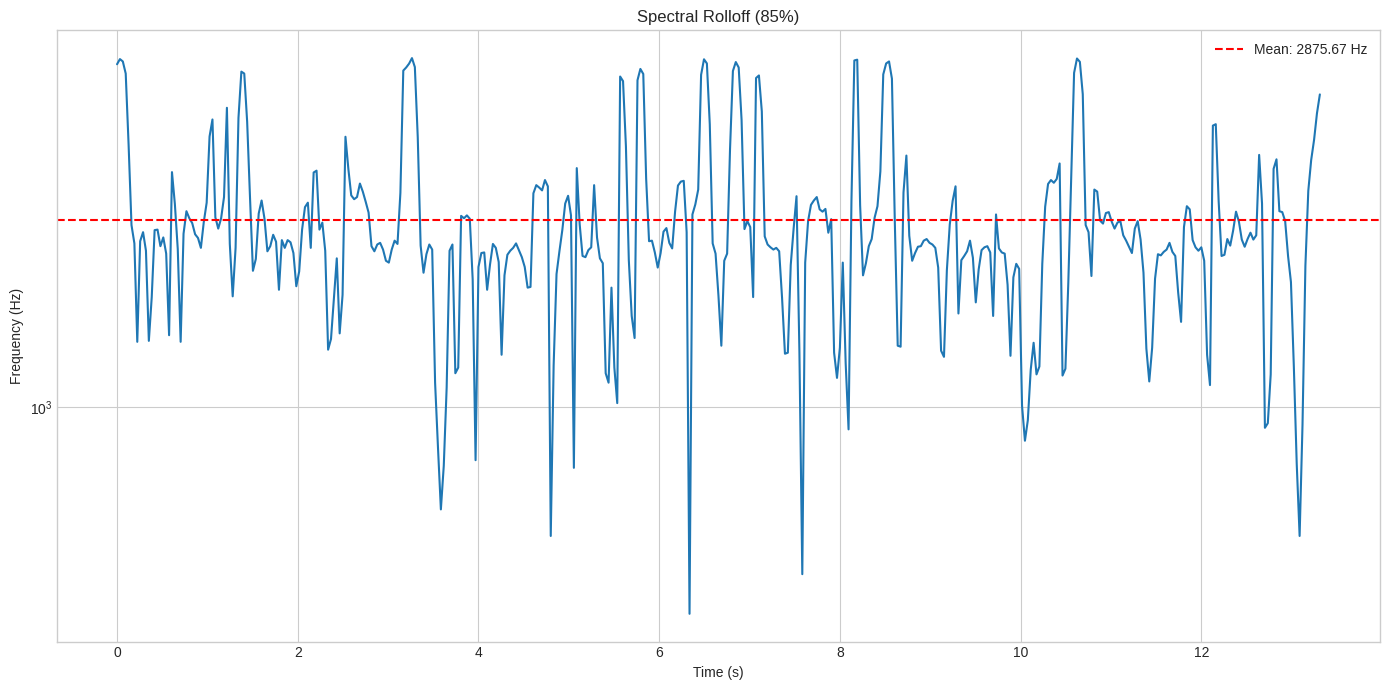

In [10]:
# Compute spectral rolloff using our package's function
spectral_rolloff = compute_spectral_rolloff(audio_data, sample_rate, n_fft=2048, hop_length=512, roll_percent=0.85)
rolloff_times = librosa.times_like(spectral_rolloff, sr=sample_rate, hop_length=512)

# Plot the spectral rolloff
plt.figure(figsize=(14, 7))
plt.semilogy(rolloff_times, spectral_rolloff)
plt.axhline(np.mean(spectral_rolloff), color='r', linestyle='--', label=f'Mean: {np.mean(spectral_rolloff):.2f} Hz')
plt.title('Spectral Rolloff (85%)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've performed a comprehensive frequency domain analysis of an audio file using the CTC-SpeechRefinement package. We've examined various spectral features including the STFT, Mel spectrogram, spectral centroid, bandwidth, contrast, flatness, and rolloff. These features provide valuable insights into the frequency characteristics of the audio signal, which can be useful for speech recognition tasks, audio classification, and other audio processing applications.